# Speech feature visualization

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from typing import List

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.options.display.max_columns = None

import sys
sys.path.append('..')
from sgs_utils.path_conf import loc_data_dir

In [3]:
df_feat_tot = pd.read_parquet(loc_data_dir.joinpath("df_speech_feat_tot.parquet"))
df_session = pd.read_parquet(loc_data_dir.joinpath('df_session_uuid.parquet'))

In [4]:
df_feat_session = df_session.merge(df_feat_tot, on=['ID', 'DB', 'pic_name', 'time_str'])
df_feat_session.head(3)

age education     sex                        timestamp  \
0   29      unif  female 2020-11-27 20:02:22.592132+01:00   
1   29      unif  female 2020-11-27 20:02:22.592132+01:00   
2   29      unif  female 2020-11-27 20:02:22.592132+01:00   

                                     ID  Marloes  PiSCES  Radboud device  \
0  0bae55f8-2aab-4c7b-917f-7f0c3e627e5f        7      15       15   None   
1  0bae55f8-2aab-4c7b-917f-7f0c3e627e5f        7      15       15   None   
2  0bae55f8-2aab-4c7b-917f-7f0c3e627e5f        7      15       15   None   

                                    pic_name  time_str  wav_size  \
0                                    marloes  20:11:50   3252268   
1                                Picture 105  20:13:00   4104236   
2  Rafd090_24_Caucasian_male_neutral_frontal  20:13:51   3498028   

   wav_duration_s       DB  arousal  valence                             time  \
0       33.877333  marloes     41.0     42.0 2020-11-27 20:11:50.592132+01:00   
1       42.752000   PiSCES     33.0     56.0 2020-11-27 20:13:00.592132+01:00   
2       36.437333  Radboud     44.0     53.0 2020-11-27 20:13:51.592132+01:00   

   DB_no  session_no  pic_no                                  uuid  \
0      1           1     NaN  584871ea-39d4-41fe-80f4-1f602bab38f6   
1      1           2     1.0  206f620d-6c5e-48fd-adff-f44aa4fbb48c   
2      1           3     2.0  4ac5c802-bb03-4075-8d51-060d39f264fe   

                                                file     start  \
0  /users/jonvdrdo/jonas/data/speech_webapp/backu...  00:00:00   
1  /users/jonvdrdo/jonas/data/speech_webapp/backu...  00:00:00   
2  /users/jonvdrdo/jonas/data/speech_webapp/backu...  00:00:00   

               end  F0semitoneFrom27.5Hz_sma3nz_amean  \
0  00:00:33.877333                          34.605030   
1  00:00:42.752000                          34.964466   
2  00:00:36.437333                          35.215466   

   F0semitoneFrom27.5Hz_sma3nz_stddevNorm  \
0                                0.196805   
1                                0.156670   
2                                0.177433   

   F0semitoneFrom27.5Hz_sma3nz_percentile20.0  \
0                                   32.101147   
1                                   32.438030   
2                                   32.910858   

   F0semitoneFrom27.5Hz_sma3nz_percentile50.0  \
0                                   33.770920   
1                                   33.352669   
2                                   34.590302   

   F0semitoneFrom27.5Hz_sma3nz_percentile80.0  \
0                                   36.396057   
1                                   35.630615   
2                                   36.586578   

   F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2  \
0                                  4.294910   
1                                  3.192585   
2                                  3.675720   

   F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope  \
0                                   184.968307   
1                                   163.240738   
2                                   240.039291   

   F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope  \
0                                     155.196335   
1                                     154.651581   
2                                     449.952667   

   F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope  \
0                                    114.923958   
1                                    109.200096   
2                                     68.857719   

   F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope  loudness_sma3_amean  \
0                                      146.325912             0.997439   
1                                      186.995544             0.989888   
2                                       65.833954             0.904825   

   loudness_sma3_stddevNorm  loudness_sma3_percentile20.0  \
0                  1.018122                      0.077508   
1                  1.140389                      0.050889   
2                  1.318

In [5]:
df_feat_session["speech_style"] = df_feat_session.DB.map(
    lambda x: {"marloes": "Read", "PiSCES": "SGS", "Radboud": "SGS"}.get(x)
)

`TODO` Participant filtering

# Visualizations

In [6]:
id_vars = [
    "file",
    "start",
    "end",
    "DB",
    "speech_style",
    "DB_no",
    "education",
    "timestamp",
    "time_str",
    "sex",
    "age",
    "PiSCES",
    "Radboud",
    "session_no",
    "ID",
    "wav_size",
    "device",
    "pic_name",
    "arousal",
    "valence",
    "time",
    "pic_no",
    "uuid",
]

In [7]:
dur_mask = df_feat_session.wav_duration_s >= 15

In [9]:
from scipy.stats import mannwhitneyu

In [10]:
feat_score_list = []
for feature in set(df_feat_session.columns).difference(list(id_vars)):
    test = mannwhitneyu(
        df_feat_session[(df_feat_session.speech_style == "Read") & dur_mask][feature],
        df_feat_session[(df_feat_session.speech_style == 'SGS') & dur_mask][feature],
        alternative="two-sided",
        nan_policy="omit",
    )
    feat_score_list.append([feature, test.pvalue])

In [18]:
df = pd.DataFrame(feat_score_list, columns=['feature', 'p_value']).sort_values(by='p_value')
df_rel = df[df.p_value < 0.001]
df_rel_05 = df[df.p_value < 0.05]

## `GeMAPS`

### Block comparison

/root/.cache/pypoetry/virtualenvs/semi-guided-speech-irC9fLWQ-py3.8/lib/python3.8/site-packages/seaborn/categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


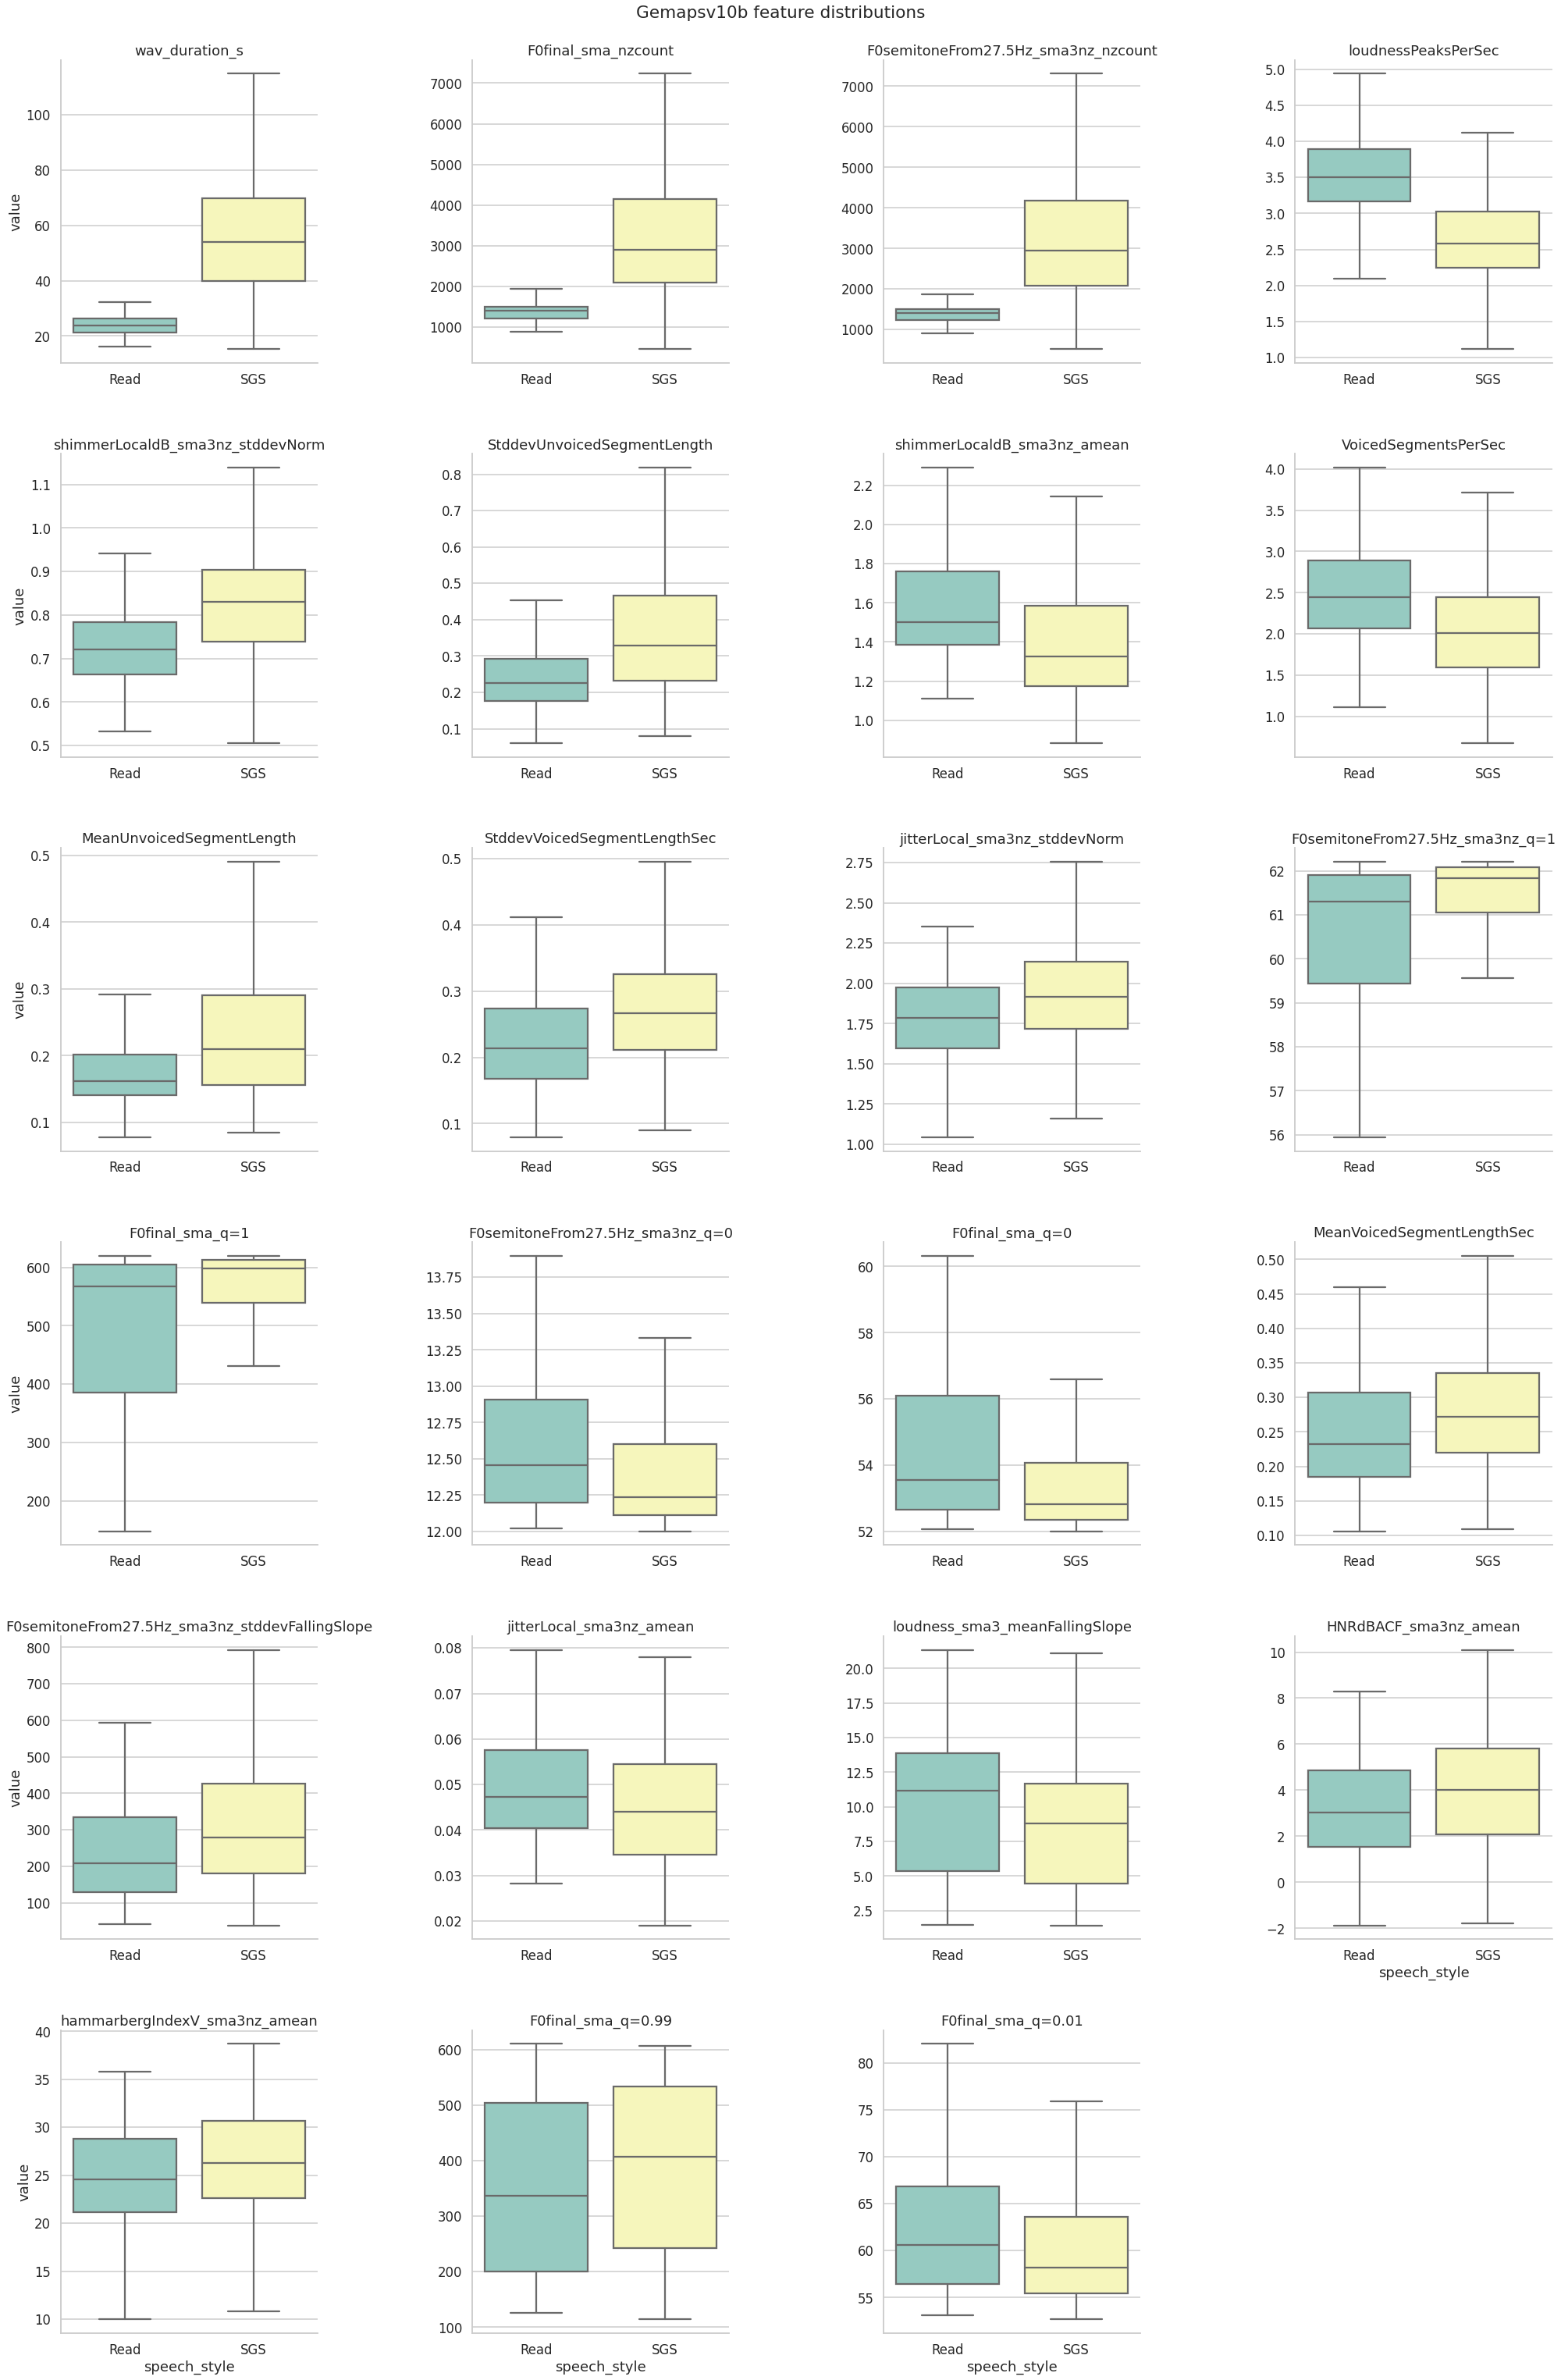

In [17]:
sns.set_context("talk")
sns.set_style("whitegrid")
g = sns.catplot(
    data=pd.melt(
        frame=df_feat_session[dur_mask],
        id_vars=id_vars,
        value_vars=df_rel.feature.values,
        value_name="value",
        var_name="v",
    ),
    x="speech_style",
    y="value",
    col="v",
    col_wrap=4,
    height=7,
    kind="box",
    # bw=0.2,
    palette="Set3",
    sharey=False,
    sharex=False,
    showfliers=False,
)
g.fig.suptitle("Gemapsv10b feature distributions", y=1.01)
g.set_titles('{col_name}')
plt.subplots_adjust(wspace=0.6, hspace=0.3)
box_ylims = [ax.get_ylim() for ax in g.axes.flat]

/root/.cache/pypoetry/virtualenvs/semi-guided-speech-irC9fLWQ-py3.8/lib/python3.8/site-packages/seaborn/categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


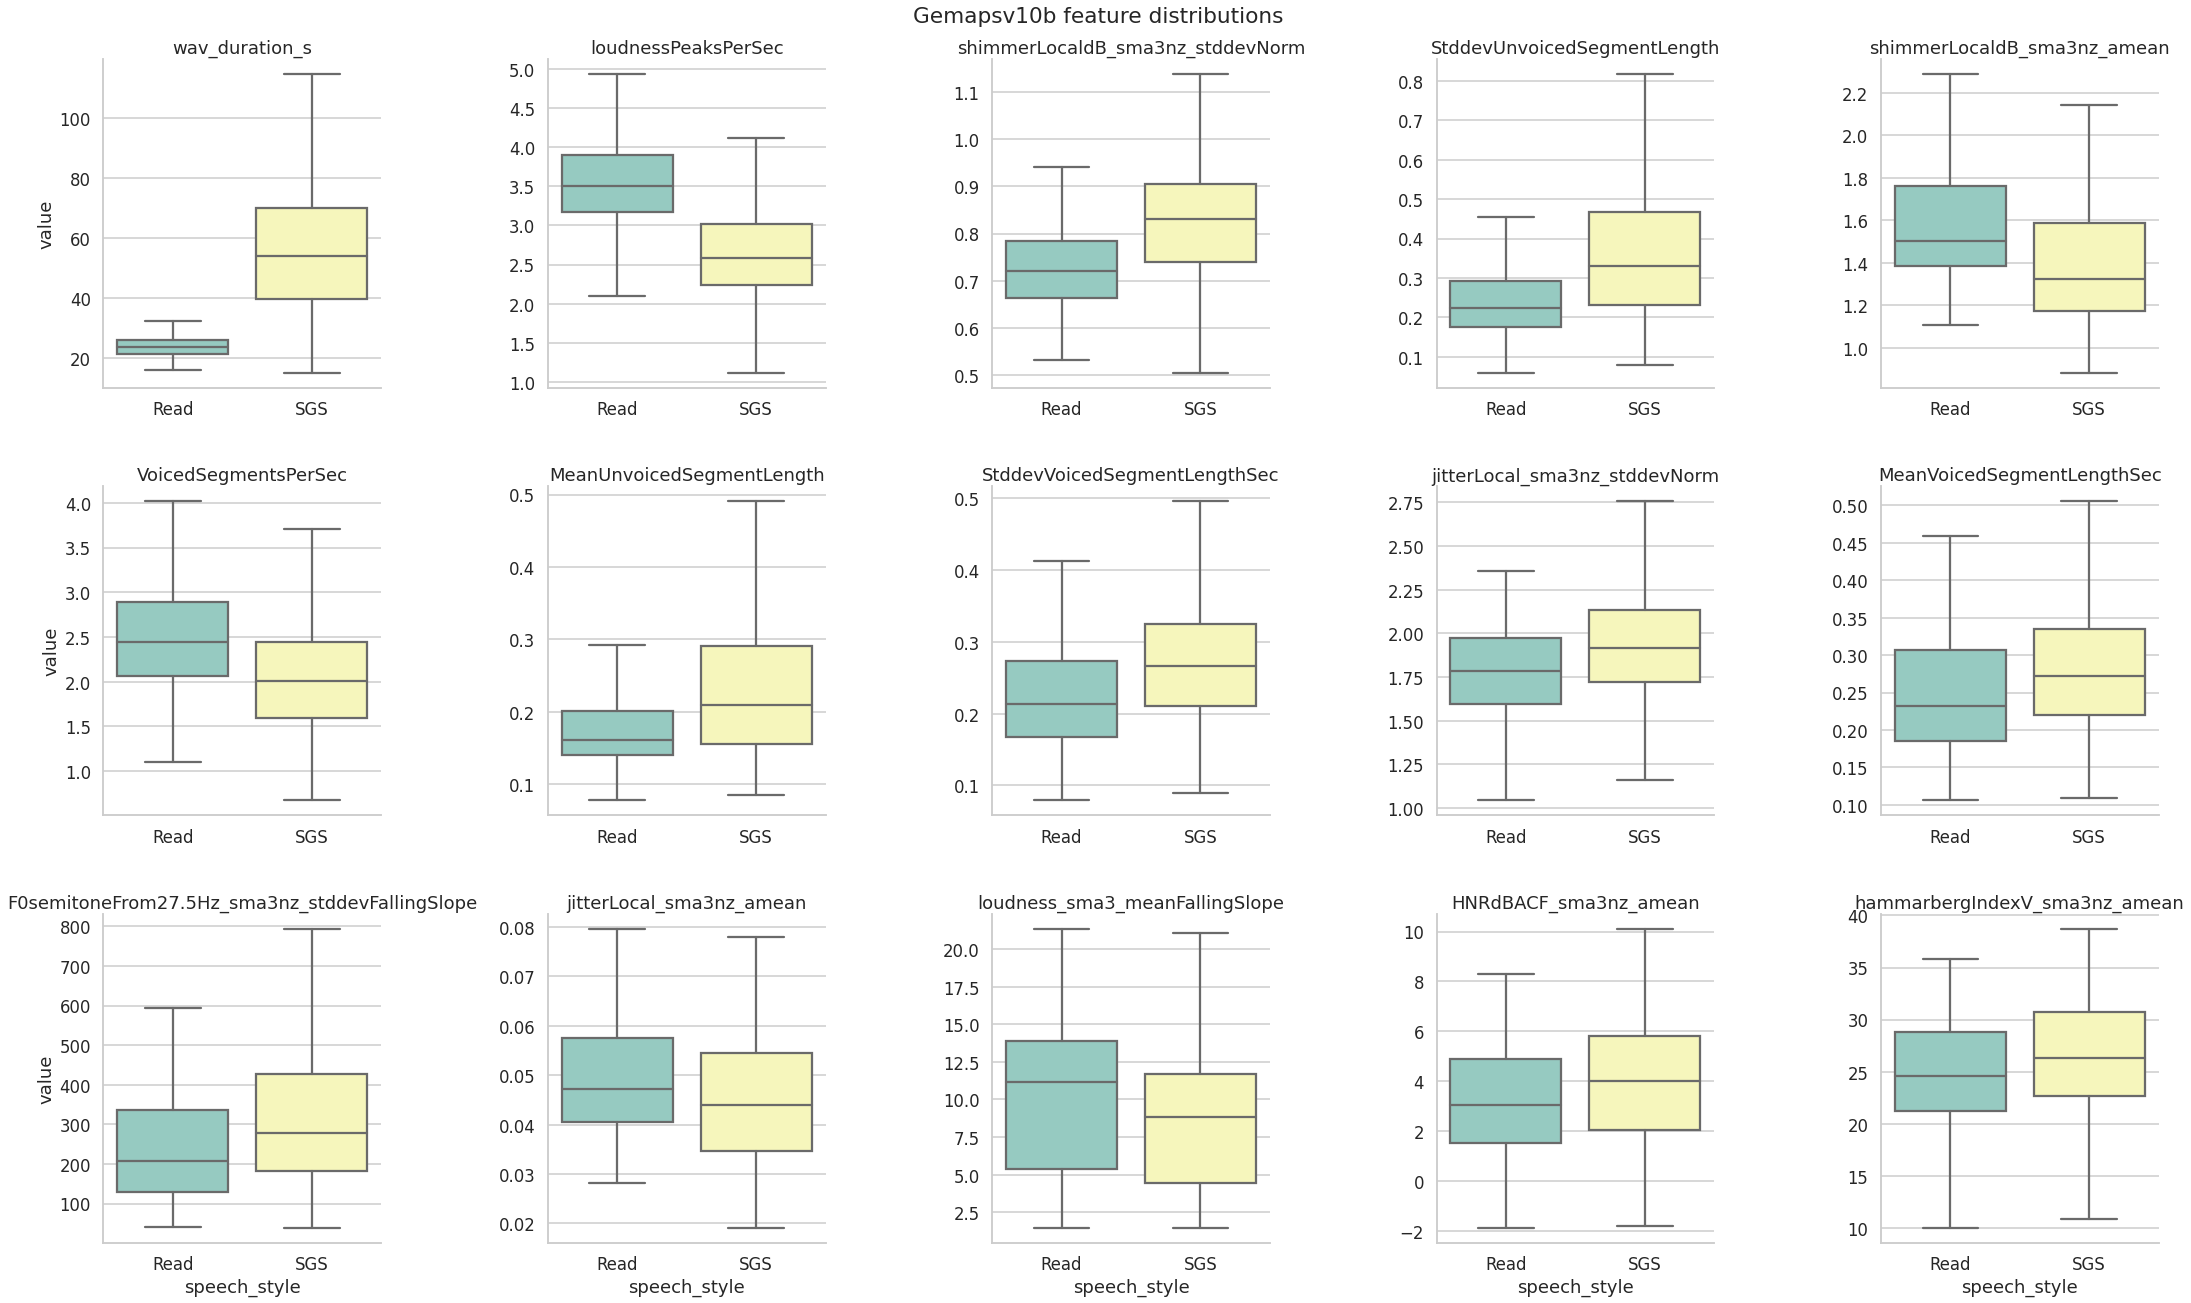

In [25]:
sns.set_context("talk")
sns.set_style("whitegrid")
g = sns.catplot(
    data=pd.melt(
        frame=df_feat_session[dur_mask],
        id_vars=id_vars,
        # Note: this way 
        value_vars=df_rel[df_rel.feature.isin(
        set(df_rel.feature.values).difference(
            # also to not visualize the LLD quantile's + counts
            list(df_feat_session.filter(like="q=").columns.values)
            + list(df_feat_session.filter(like="qd=").columns.values)
            + list(df_feat_session.filter(like="nzcount").columns.values)
        )
    )].feature.values,
        value_name="value",
        var_name="v",
    ),
    x="speech_style",
    y="value",
    col="v",
    col_wrap=5,
    height=6,
    kind="box",
    palette="Set3",
    sharey=False,
    sharex=False,
    showfliers=False,
)
g.fig.suptitle("Gemapsv10b feature distributions", y=1.01)
g.set_titles('{col_name}')
plt.subplots_adjust(wspace=0.6, hspace=0.3)
box_ylims = [ax.get_ylim() for ax in g.axes.flat]

/root/.cache/pypoetry/virtualenvs/semi-guided-speech-irC9fLWQ-py3.8/lib/python3.8/site-packages/seaborn/categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


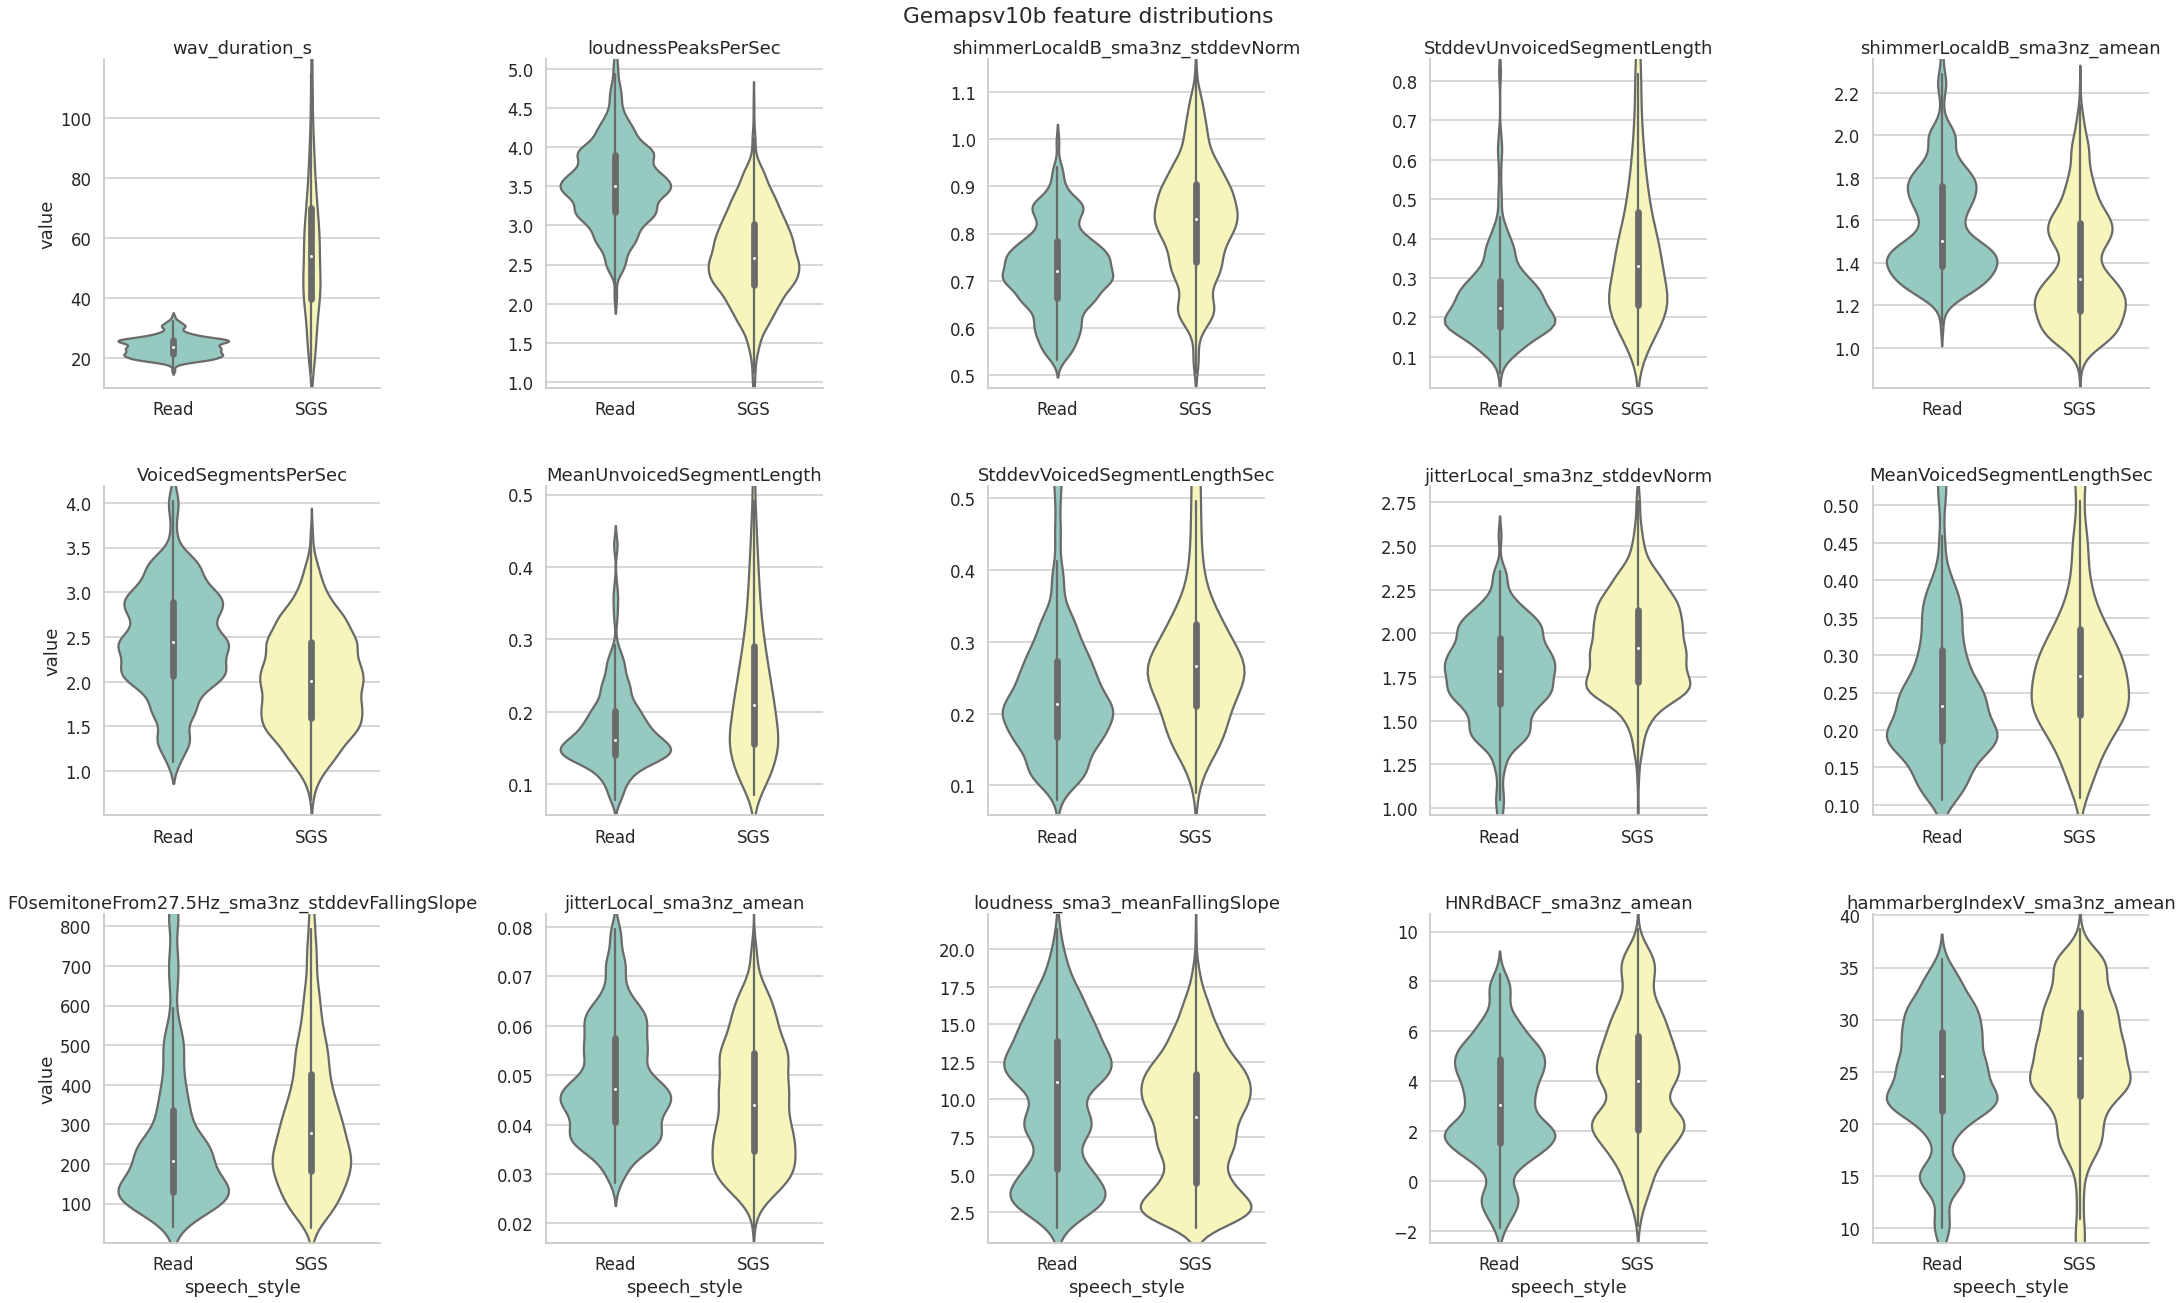

In [28]:
sns.set_context("talk")
sns.set_style("whitegrid")
g = sns.catplot(
    data=pd.melt(
        frame=df_feat_session[dur_mask],
        id_vars=id_vars,
        # Note: this way
        value_vars=df_rel[
            df_rel.feature.isin(
                set(df_rel.feature.values).difference(
                    # also to not visualize the LLD quantile's + counts
                    list(df_feat_session.filter(like="q=").columns.values)
                    + list(df_feat_session.filter(like="qd=").columns.values)
                    + list(df_feat_session.filter(like="nzcount").columns.values)
                )
            )
        ].feature.values,
        var_name='v',
    ),
    x="speech_style",
    y="value",
    col="v",
    col_wrap=5,
    height=6,
    kind="violin",
    bw=0.2,
    palette="Set3",
    sharey=False,
    sharex=False,
    showfliers=False,
)
g.fig.suptitle("Gemapsv10b feature distributions", y=1.01)
g.set_titles("{col_name}")

for ax, ylim in zip(g.axes.flat, box_ylims):
    ax.set_ylim(*ylim)

plt.subplots_adjust(wspace=0.6, hspace=0.3)


/root/.cache/pypoetry/virtualenvs/semi-guided-speech-irC9fLWQ-py3.8/lib/python3.8/site-packages/seaborn/categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


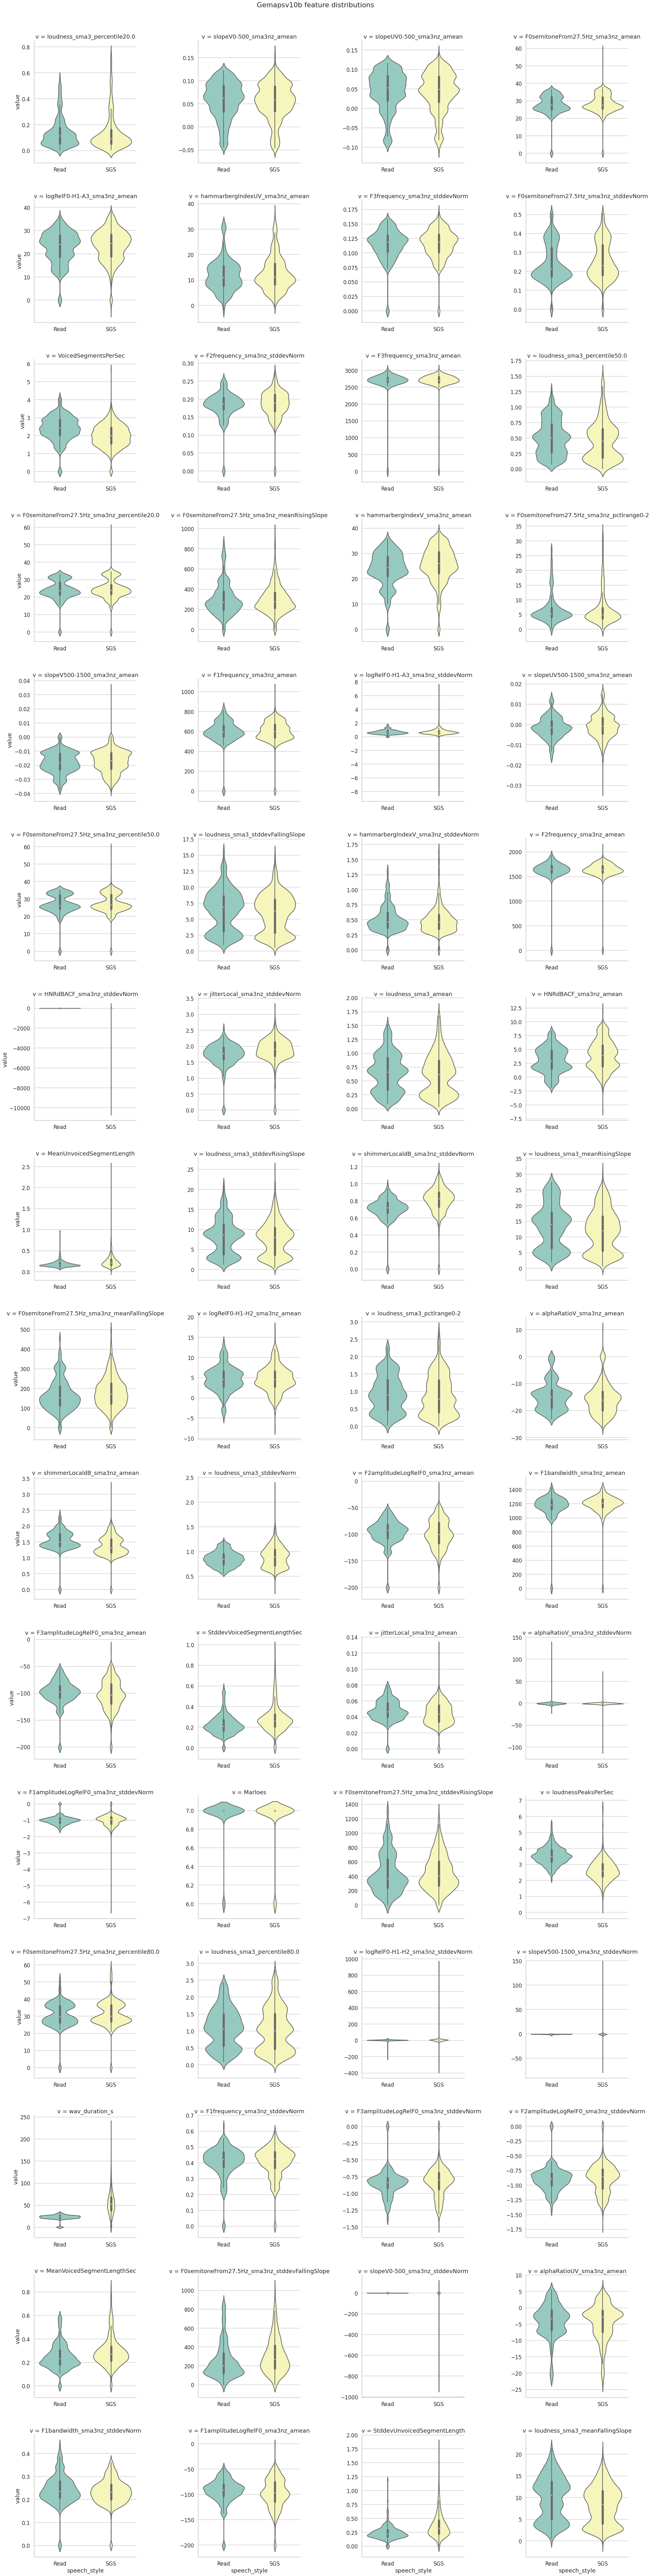

In [ ]:
sns.set_context("talk")
sns.set_style("whitegrid")
g = sns.catplot(
    data=pd.melt(
        frame=df_feat_session,
        id_vars=id_vars,
        value_vars=set(df_feat_session.columns).difference(
            list(id_vars)
            # also to not visualize the LLD quantile's + counts
            + list(df_feat_session.filter(like="q=").columns.values)
            + list(df_feat_session.filter(like="qd=").columns.values)
            + list(df_feat_session.filter(like="nzcount").columns.values),
        ),
        value_name="value",
        var_name="v",
    ),
    x="speech_style",
    y="value",
    col="v",
    col_wrap=4,
    height=7,
    kind="violin",
    bw=0.2,
    palette="Set3",
    sharey=False,
    sharex=False,
)
g.fig.suptitle("Gemapsv10b feature distributions", y=1.01)
plt.subplots_adjust(wspace=0.6, hspace=0.3)

### Per participant difference plot

In [59]:
# calculate the mean per participant, per block
# TODO -> maybe use the reference values? and subtract the control / stress block
# from these reference values
mean_func = (
    df_feat_session[dur_mask]
    .groupby(["ID", "speech_style"])[
        list(set(df_feat_session.columns).difference(id_vars))
    ]
    .mean()
    .reset_index()
)

mean_sgs_func = mean_func[mean_func.speech_style == "SGS"].set_index("ID")
mean_read_func = mean_func[mean_func.speech_style == "Read"].set_index("ID")

feat_cols: List[str] = list(
    set(df_feat_session.columns).difference(
        id_vars
        + list(df_feat_session.filter(like="q=").columns.values)
        + list(df_feat_session.filter(like="qd=").columns.values)
        + list(df_feat_session.filter(like="nzcount").columns.values),
    )
)
mean_sgs_read_func = mean_sgs_func[feat_cols] - mean_read_func[feat_cols]


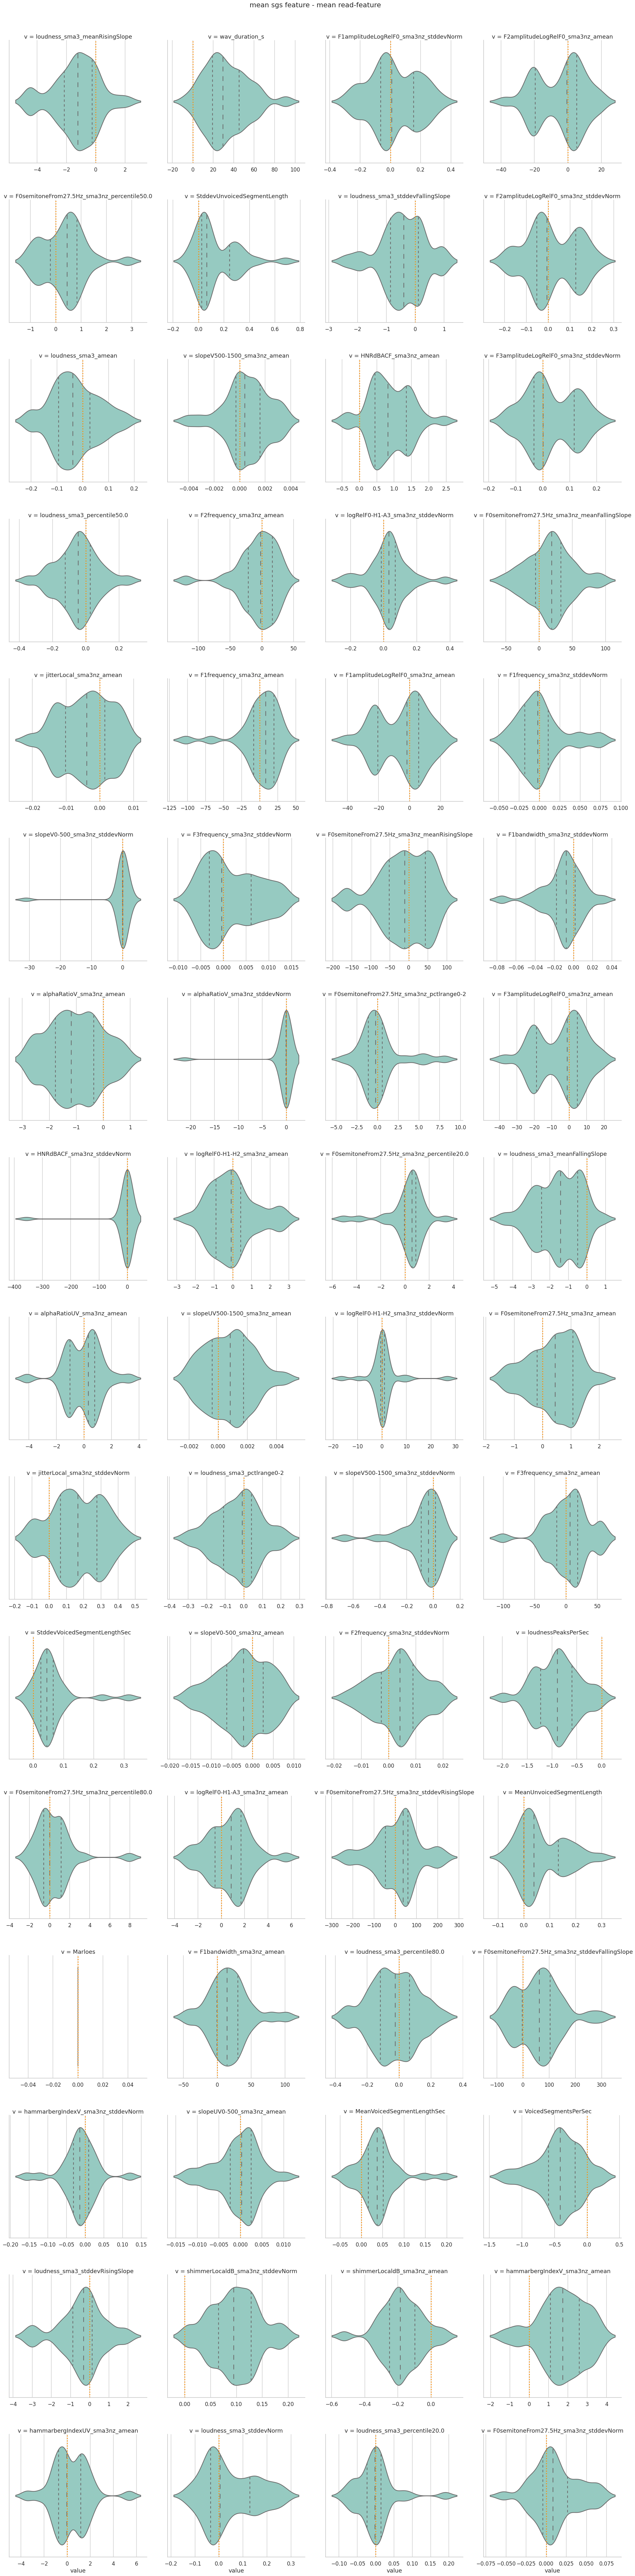

In [60]:
g = sns.catplot(
    data=mean_sgs_read_func[
        ~mean_sgs_read_func.index.isin(
            list(
                set(mean_sgs_func.index)
                .difference(mean_read_func.index)
                .union(set(mean_read_func.index).difference(mean_sgs_func.index))
            )
        )
    ]
    .iloc[:, :]
    .melt(var_name="v"),
    col="v",
    x="value",
    kind="violin",
    height=7,
    bw=0.3,
    inner="quartile",
    col_wrap=4,
    sharex=False,
    palette="Set3",
)
g.fig.suptitle("mean sgs feature - mean read-feature", y=1.01)
for ax in g.fig.axes:
    ax.axvline(x=0, color="darkorange", linestyle=":", linewidth=3)
plt.subplots_adjust(wspace=0.15, hspace=0.3)

# TODO --> also take duration effect into account


## `LLD's`: F0-range

### Block comparison

In [12]:
qs = sum([[1 - q, q] for q in [0, 0.01, 0.02, 0.03, 0.05, 0.1, 0.15, 0.2]], [])
q_med = [0.5]

In [21]:
for sig in ["F0final_sma", "F0semitoneFrom27.5Hz_sma3nz"]:
    for (max_q, min_q) in list(zip(qs[::2], qs[1::2])):
        max_q_col = "_".join([sig, f"q={max_q}"])
        min_q_col = "_".join([sig, f"q={min_q}"])

        df_feat_session[f"{sig}_qd={max_q}-{min_q}"] = (
            df_feat_session[max_q_col] - df_feat_session[min_q_col]
        )


In [25]:
# hier opnieuw statistics voor uitvoeren voro de relevance levels

In [ ]:
sns.set_context("talk")
sns.set_style("whitegrid")
g = sns.catplot(
    data=pd.melt(
        frame=df_feat_session[dur_mask],
        id_vars=id_vars,
        # Note: this way 
        value_vars=df_rel_05[df_rel_09.feature.isin(
        set(df_rel.feature.values).difference(
            # also to not visualize the LLD quantile's + counts
            list(df_feat_session.filter(like="q=").columns.values)
            + list(df_feat_session.filter(like="qd=").columns.values)
            + list(df_feat_session.filter(like="nzcount").columns.values)
        )
    )].feature.values,
        value_name="value",
        var_name="v",
    ),
    x="speech_style",
    y="value",
    col="v",
    col_wrap=5,
    height=6,
    kind="box",
    palette="Set3",
    sharey=False,
    sharex=False,
    showfliers=False,
)
g.fig.suptitle("Gemapsv10b feature distributions", y=1.01)
g.set_titles('{col_name}')
plt.subplots_adjust(wspace=0.6, hspace=0.3)
box_ylims = [ax.get_ylim() for ax in g.axes.flat]

In [20]:
df_rel_05.feature.isin(
    set(df_rel_05.feature.values).intersection(
        # also to not visualize the LLD quantile's + counts
        list(df_feat_session.filter(like="qd=").columns.values)
    )
).sum()

0

In [15]:
sns.catplot(
    data=pd.melt(
        frame=df_feat_session[dur_mask],
        id_vars=id_vars,
        value_vars=df_rel_05[
            df_rel_05.feature.isin(
                set(df_rel_05.feature.values).intersection(
                    # also to not visualize the LLD quantile's + counts
                    list(df_feat_session.filter(like="qd=").columns.values)
                )
            )
        ].feature.values,
        value_name="value",
        var_name="v",
    ),
    x="speech_style",
    y="v",
    col="f_name",
    col_wrap=3,
    height=7,
    sharey=False,
    palette="Set3",
    kind="violin",
    bw=0.1,
)
plt.subplots_adjust(wspace=0.6, hspace=0.3)


TypeError: Neither the `x` nor `y` variable appears to be numeric.

### Per participant difference plot

In [16]:
# calculate the mean per participant, per block
# TODO -> maybe use the reference values? and subtract the control / stress block
# from these reference values
mean_func = (
    df_feat_session.groupby(["ID", "speech_style"])[
        list(set(df_feat_session.columns).difference(id_vars))
    ]
    .mean()
    .reset_index()
)

mean_sgs_func = mean_func[mean_func.speech_style == "SGS"].set_index("ID")
mean_read_func = mean_func[mean_func.speech_style == "Read"].set_index("ID")

feat_cols: List[str] = list(df_feat_session.filter(like="qd=").columns.values)

mean_sgs_read_func = mean_sgs_func[feat_cols] - mean_read_func[feat_cols]

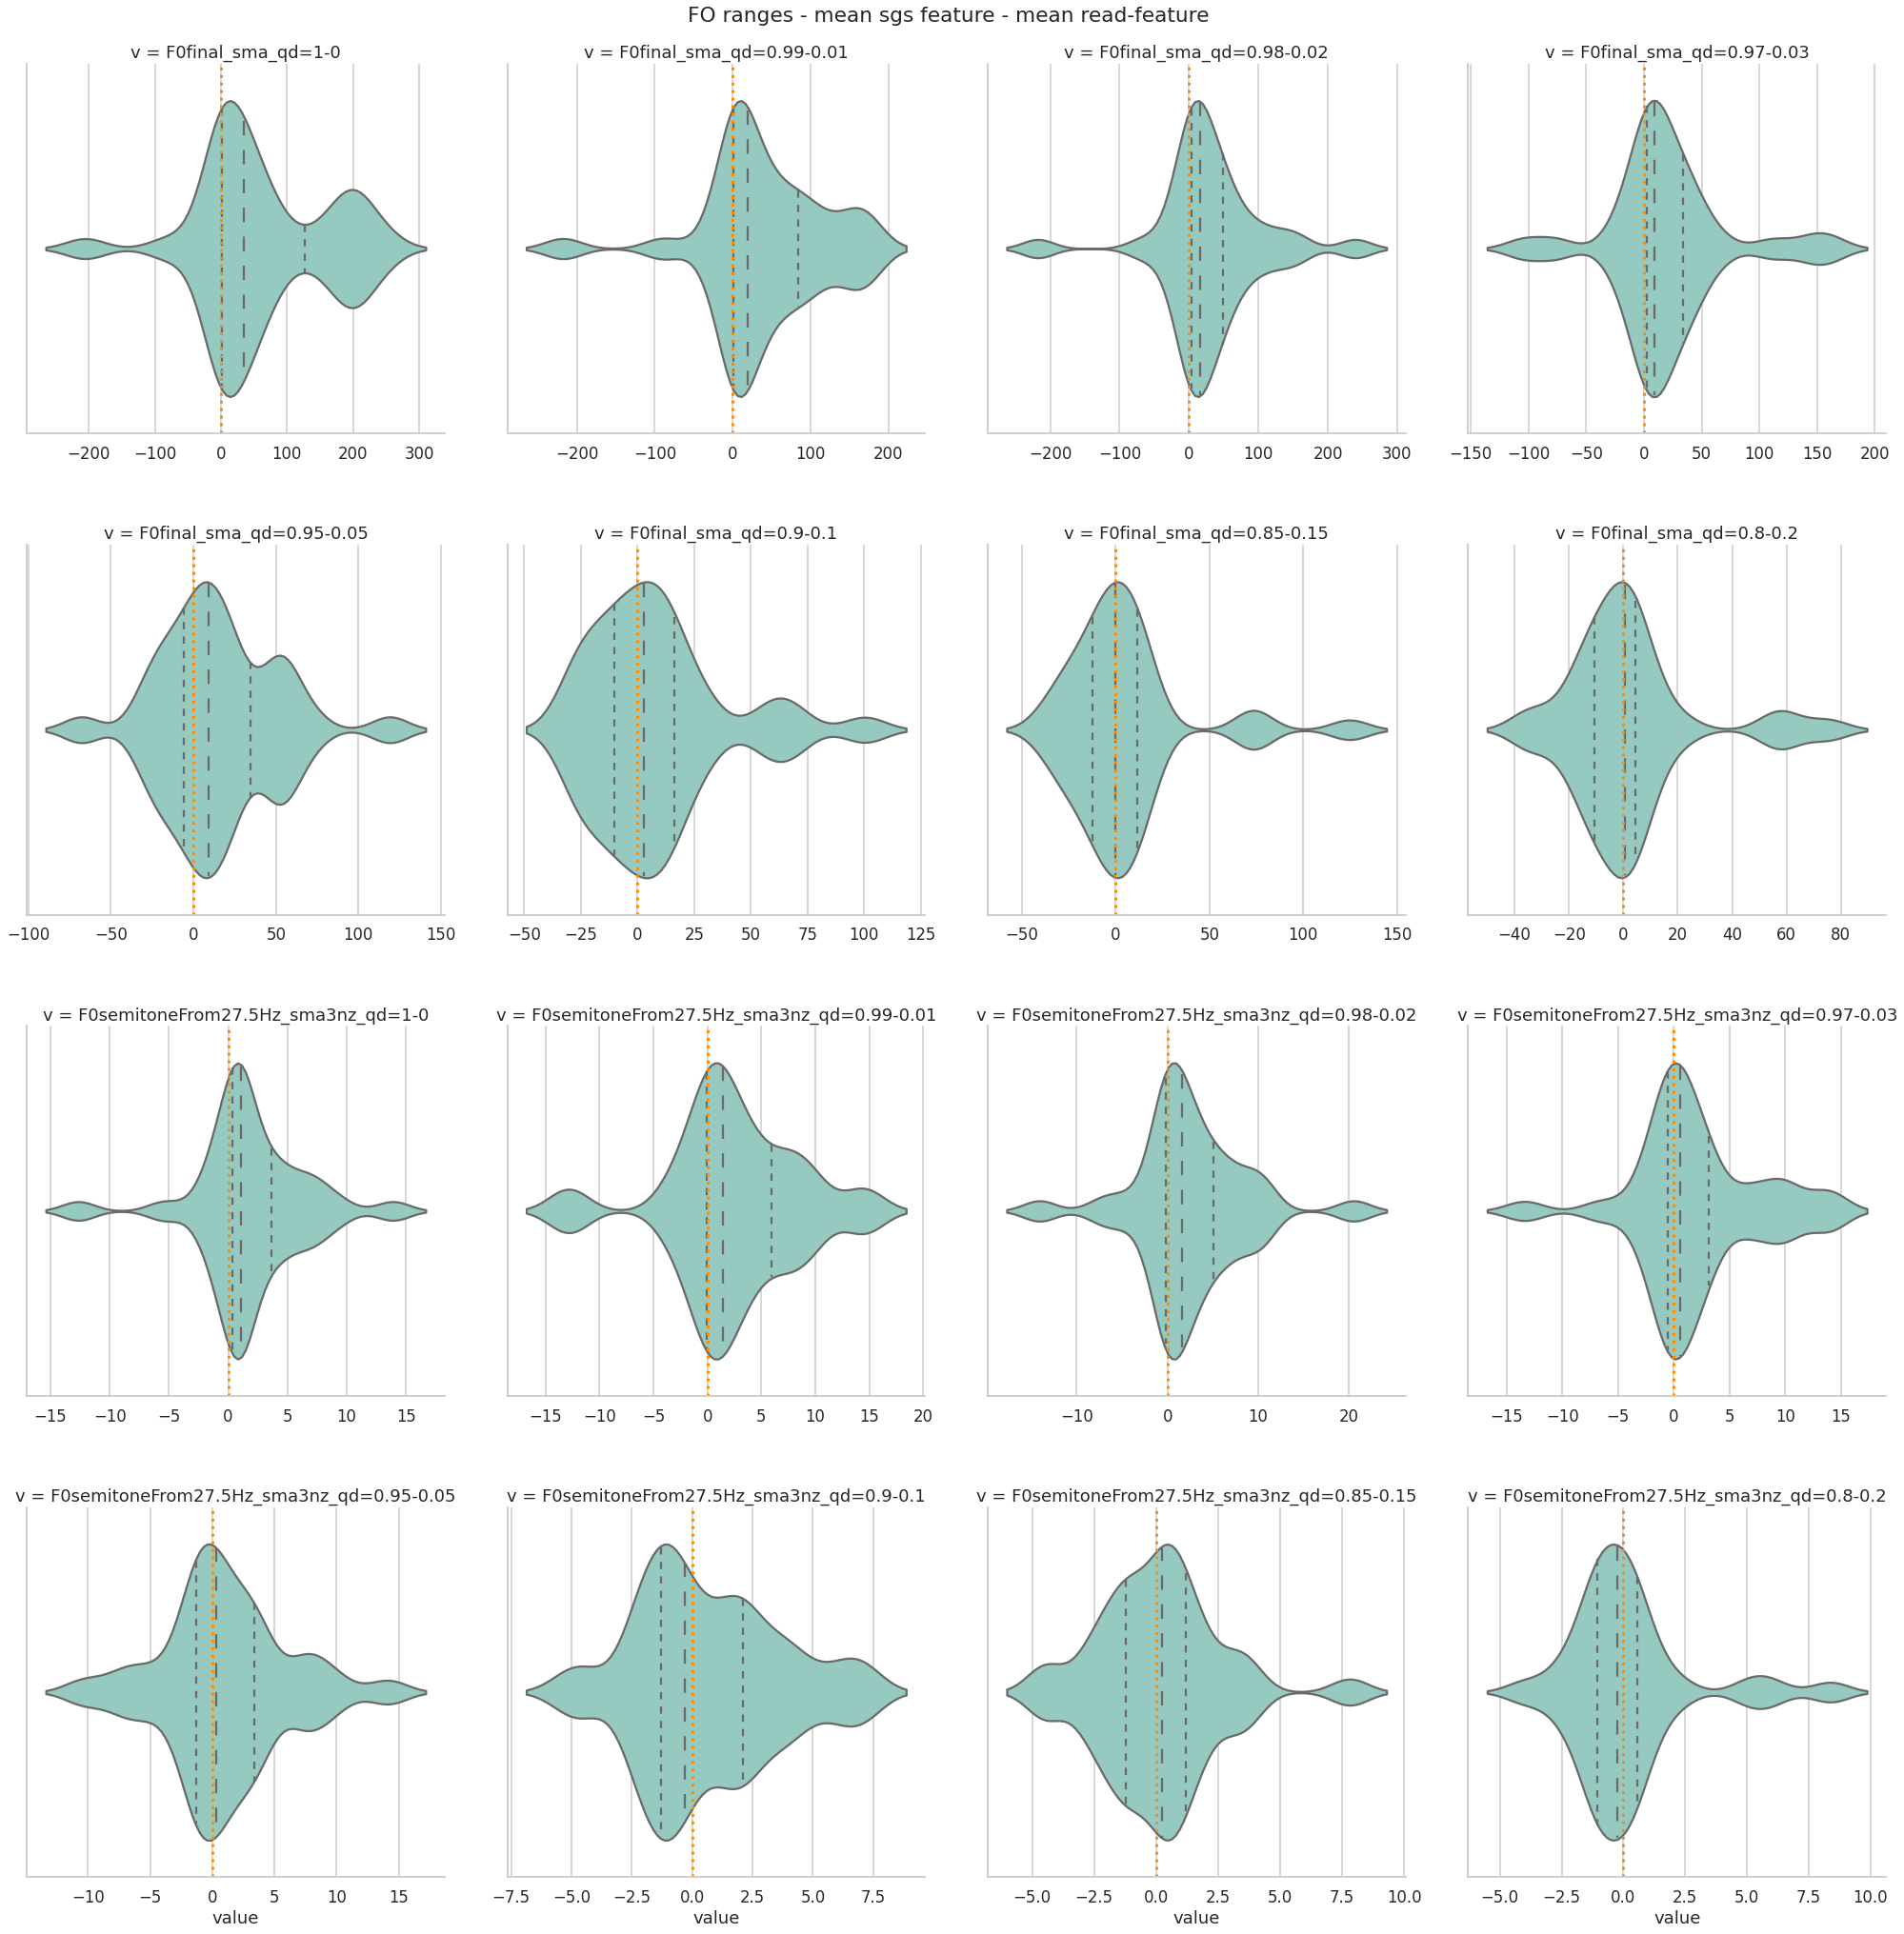

In [18]:
g = sns.catplot(
    data=mean_sgs_read_func[
        ~mean_sgs_read_func.index.isin(
            list(
                set(mean_sgs_func.index)
                .difference(mean_read_func.index)
                .union(set(mean_read_func.index).difference(mean_sgs_func.index))
            )
        )
    ]
    .iloc[:, :]
    .melt(var_name="v"),
    col="v",
    x="value",
    kind="violin",
    height=7,
    bw=0.3,
    inner="quartile",
    col_wrap=4,
    sharex=False,
    palette="Set3",
)
g.fig.suptitle("FO ranges - mean sgs feature - mean read-feature", y=1.01)
for ax in g.fig.axes:
    ax.axvline(x=0, color="darkorange", linestyle=":", linewidth=3)
plt.subplots_adjust(wspace=0.15, hspace=0.3)
